In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train(cleaned).csv")

In [3]:
x =  df.corr()['SalePrice'] > 0

In [4]:
list1 =[]
for i in range(len(x)):
    if x.values[i] == True:
        list1.append(x.index[i])

In [5]:
list1 = list1[:-1]

In [6]:
y = df['SalePrice']
x = df[list1]

In [7]:
from sklearn.preprocessing import scale,normalize
x_ = scale(x)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.2)

In [12]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_ = model.predict(x_test)

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mean_squared_error(y_test,y_)

1106606728.3657355

In [16]:
import matplotlib.pyplot as plt
plt.hist(y_test)
plt.hist(y_)

(array([ 3., 13., 49., 41., 49., 32., 19., 22.,  9.,  4.]),
 array([ 20261.08647666,  57539.19050206,  94817.29452745, 132095.39855285,
        169373.50257825, 206651.60660365, 243929.71062905, 281207.81465444,
        318485.91867984, 355764.02270524, 393042.12673064]),
 <a list of 10 Patch objects>)

In [17]:
from sklearn.model_selection import cross_validate
scores = cross_validate(model, x_, y, cv=6,scoring = 'r2')

In [18]:
scores

{'fit_time': array([0.0319941 , 0.02398276, 0.02398801, 0.02399945, 0.0199945 ,
        0.01999521]),
 'score_time': array([0.        , 0.00400424, 0.00400019, 0.        , 0.00399947,
        0.00399947]),
 'test_score': array([0.86879201, 0.85426463, 0.77459088, 0.81250823, 0.75687422,
        0.34342934])}

In [19]:
from sklearn.linear_model import Ridge
model_1 = Ridge(alpha=0.05)
model_1.fit(x_train,y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
y_1 = model_1.predict(x_test)

In [21]:
mean_squared_error(y_test,y_1)

1106409747.2826366

(array([ 3., 13., 49., 41., 49., 32., 19., 22.,  9.,  4.]),
 array([ 20261.50746971,  57536.86118105,  94812.21489239, 132087.56860374,
        169362.92231508, 206638.27602642, 243913.62973776, 281188.98344911,
        318464.33716045, 355739.69087179, 393015.04458313]),
 <a list of 10 Patch objects>)

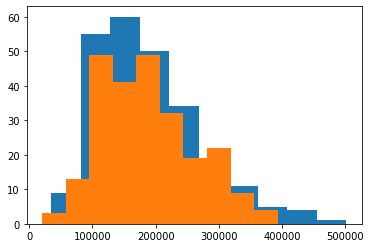

In [22]:
plt.hist(y_test)
plt.hist(y_1)

(array([ 3., 13., 49., 41., 49., 32., 19., 22.,  9.,  4.]),
 array([ 20261.08647666,  57539.19050206,  94817.29452745, 132095.39855285,
        169373.50257825, 206651.60660365, 243929.71062905, 281207.81465444,
        318485.91867984, 355764.02270524, 393042.12673064]),
 <a list of 10 Patch objects>)

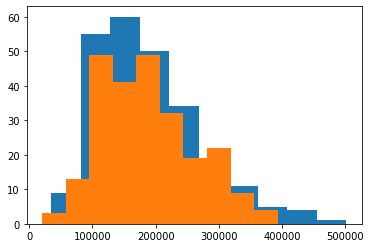

In [23]:
plt.hist(y_test)
plt.hist(y_)

In [24]:
df3 = pd.read_csv('test.csv')

In [25]:
x_1= df3[list1]

In [26]:
x_1

,LotFrontage,LotArea,Street,LandContour,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,MoSold,SaleCondition
0,80.0,11622,Pave,Lvl,Gtl,NAmes,Feedr,Norm,1Story,5,...,730.0,TA,TA,Y,140,0,0,120,6,Normal
1,81.0,14267,Pave,Lvl,Gtl,NAmes,Norm,Norm,1Story,6,...,312.0,TA,TA,Y,393,36,0,0,6,Normal
2,74.0,13830,Pave,Lvl,Gtl,Gilbert,Norm,Norm,2Story,5,...,482.0,TA,TA,Y,212,34,0,0,3,Normal
3,78.0,9978,Pave,Lvl,Gtl,Gilbert,Norm,Norm,2Story,6,...,470.0,TA,TA,Y,360,36,0,0,6,Normal
4,43.0,5005,Pave,HLS,Gtl,StoneBr,Norm,Norm,1Story,8,...,506.0,TA,TA,Y,0,82,0,144,1,Normal
5,75.0,10000,Pave,Lvl,Gtl,Gilbert,Norm,Norm,2Story,6,...,440.0,TA,TA,Y,157,84,0,0,4,Normal
6,NaN,7980,Pave,Lvl,Gtl,Gilbert,Norm,Norm,1Story,6,...,420.0,TA,TA,Y,483,21,0,0,3,Normal
7,63.0,8402,Pave,Lvl,Gtl,Gilbert,Norm,Norm,2Story,6,...,393.0,TA,TA,Y,0,75,0,0,5,Normal
8,85.0,10176,Pave,Lvl,Gtl,Gilbert,Norm,Norm,1Story,7,...,506.0,TA,TA,Y,192,0,0,0,2,Normal
9,70.0,8400,Pave,Lvl,Gtl,NAmes,Norm,Norm,1Story,4,...,525.0,TA,TA,Y,240,0,0,0,4,Normal


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in x_1.columns:
    if x_1[i].dtypes == 'object':
        x_1[i].replace(np.nan,'Unlabelled',inplace = True)
        le.fit(x_1[i])
        x_1[i]= le.transform(x_1[i])

c:\users\amrut\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6788: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
c:\users\amrut\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [30]:
x_1['GarageYrBlt'].replace(np.nan,x_1['GarageYrBlt'].mean(),inplace =True)

In [31]:
x_1.isnull().sum()

LotFrontage      227
LotArea            0
Street             0
LandContour        0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
HouseStyle         0
OverallQual        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea        15
ExterCond          0
Foundation         0
BsmtCond           0
BsmtFinSF1         1
BsmtFinType2       0
BsmtUnfSF          1
TotalBsmtSF        1
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
GarageYrBlt        0
GarageCars         1
GarageArea         1
GarageQual         0
GarageCond         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
3SsnPorch          0
ScreenPorch        0
MoSold       

In [32]:
x_1['GarageCars'].replace(np.nan,x_1['GarageCars'].mean(),inplace =True)
x_1['GarageArea'].replace(np.nan,x_1['GarageArea'].mean(),inplace =True)
x_1['LotFrontage'].replace(np.nan,x_1['LotFrontage'].mean(),inplace =True)

In [33]:
x_1['MasVnrArea'].replace(np.nan,x_1['MasVnrArea'].mean(),inplace =True)

In [34]:
x_1['BsmtFinSF1'].replace(np.nan,x_1['BsmtFinSF1'].mean(),inplace =True)

In [35]:
x_1['BsmtUnfSF'].replace(np.nan,x_1['BsmtUnfSF'].mean(),inplace =True)

In [36]:
x_1['TotalBsmtSF'].replace(np.nan,x_1['BsmtUnfSF'].mean(),inplace =True)

In [37]:
x_1['BsmtFullBath'].replace(np.nan,x_1['BsmtFullBath'].mean(),inplace =True)

In [38]:
x_1.astype('int64')

,LotFrontage,LotArea,Street,LandContour,LandSlope,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,MoSold,SaleCondition
0,80,11622,1,3,0,12,1,2,2,5,...,730,3,4,2,140,0,0,120,6,4
1,81,14267,1,3,0,12,2,2,2,6,...,312,3,4,2,393,36,0,0,6,4
2,74,13830,1,3,0,8,2,2,4,5,...,482,3,4,2,212,34,0,0,3,4
3,78,9978,1,3,0,8,2,2,4,6,...,470,3,4,2,360,36,0,0,6,4
4,43,5005,1,1,0,22,2,2,2,8,...,506,3,4,2,0,82,0,144,1,4
5,75,10000,1,3,0,8,2,2,4,6,...,440,3,4,2,157,84,0,0,4,4
6,68,7980,1,3,0,8,2,2,2,6,...,420,3,4,2,483,21,0,0,3,4
7,63,8402,1,3,0,8,2,2,4,6,...,393,3,4,2,0,75,0,0,5,4
8,85,10176,1,3,0,8,2,2,2,7,...,506,3,4,2,192,0,0,0,2,4
9,70,8400,1,3,0,12,2,2,2,4,...,525,3,4,2,240,0,0,0,4,4


In [44]:
x_1 = scale(x_1)

In [45]:
y__ = model_1.predict(x_1)

In [47]:
x = pd.DataFrame(y__)
x.to_csv('test3.csv')

In [48]:
y__ = model.predict(x_1)

In [50]:
x = pd.DataFrame(y__)
x.to_csv('test4.csv')